In [1]:
# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#NLTK
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words

#Scitkit-Learn
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer


# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#get all Nltk programs
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
#Get the data
data = pd.read_csv('/content/rNarcolepsy.csv')
data.head()

,URL,Post,Comments,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,https://www.reddit.com/r/Narcolepsy/comments/5...,I was diagnosed with narcolepsy about a month ...,I hated Nuvigil/Provigil. Similar experi nice ...,Change doctors. Even if your current doctor i...,"This. Your doctor works for you, the client. H...","Yeah, after the follow up this morning I proba...",There are multiple reasons to have conditions ...,My doctor went the other way &amp; put me on X...,Everyone has hit the nail on the head about ch...,Talk to your pharmacist about the side effects...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.reddit.com/r/Narcolepsy/comments/n...,Hello!! I’m waiting for my sleep study to be a...,If something like that is “approved” by insura...,"Depends if you have a deductible, co insurance...",The equipment feels weird and impossible to sl...,Thank you so much for this!!!! I appreciate it...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.reddit.com/r/Narcolepsy/comments/e...,I have been diagnosed since 2014. I have been ...,There's no reason you can't have both depressi...,For so many years I was basically unable to di...,How are your vitamin D levels? Sounds like you...,I wish I had some suggestions for you but I do...,I’m trying to remember if I was sleep walking ...,My symptoms are 100x worse in the winter month...,It sounds like both. I’ve been there and I get...,This isn't advice but I 100% feel the same way...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.reddit.com/r/Narcolepsy/comments/5...,I have had very noticeable daytime fatigue/sle...,"Your symptoms are not that typical of N, but o...",I would go a step further and say that what wa...,Second comment to add that sleep hygiene can t...,Yeah I am not 100% convinced it is narcolepsy....,Yeah - this is not news to me. I have a very r...,"Yes - to be clear, I was certainly unable to m...",Your symptoms sound similar to mine. I have id...,Best of luck. The MSLT is generally a pretty w...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.reddit.com/r/Narcolepsy/comments/8...,So I did my overnight and my MSLT yesterday. I...,I felt the same way about my MSLT. There is so...,I had asked the techs though if I had reached ...,I’m a light sleeper and construction was happe...,"I thought i too messed it up, on top of that m...",Was it easy to get another MSLT?,[deleted],Yes. My doctor asked if I would do another tes...,"I've done two, the first I hit REM twice and w...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Check for nulls
data.isnull().values.any()

True

In [5]:
# Replace all Nan values to empty string
data = data.replace(np.nan, '', regex=True)

In [6]:
import string

#Convert whole dataframe to string for preprocessing and lowercase the data
data = data.apply(lambda x: x.astype(str).str.lower())

In [7]:
#decode ascii 
data['Cleaned_Post'] = data['Post'].str.encode('ascii', 'ignore').str.decode('ascii')
data['Cleaned_Comments'] = data['Comments'].str.encode('ascii', 'ignore').str.decode('ascii')

In [8]:
import re
#remove digits and words containing digits in both Post and Comments columns
data['Cleaned_Post'] = data['Cleaned_Post'].apply(lambda x: re.sub('\w*\d\w*','',x))
data['Cleaned_Comments'] = data['Cleaned_Comments'].apply(lambda x: re.sub('\w*\d\w*','',x))

In [9]:
#Remove punctuations in both Post and Comments columns
data['Cleaned_Post']=  data['Cleaned_Post'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
data['Cleaned_Comments']=  data['Cleaned_Comments'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [10]:
#Removing extra spaces in both Post and Comments columns
data['Cleaned_Post'] = data['Cleaned_Post'].apply(lambda x: re.sub(' +',' ',x))
data['Cleaned_Comments'] = data['Cleaned_Comments'].apply(lambda x: re.sub(' +',' ',x))

In [11]:
#Removing \n characters from text
data['Cleaned_Post'] = data['Cleaned_Post'].replace('\n\n', '')
data['Cleaned_Comments'] = data['Cleaned_Comments'].replace('\n\n', '')

In [12]:
#preview of cleaned post body text
for index,text in enumerate(data['Cleaned_Post'][30:35]):
  print('Post %d:\n'%(index+1),text)

Post 1:
 is feeling as if im just in a state of constant fog all the time related i feel as if my brain just doesnt fully work during the day then right before bed its like i get a second wind and my brain just starts working its extremely confusing
Post 2:
 i have had my xyrem sitting on my desk since last saturdayim just nervous about starting it

i feel like changing my schedule to accommodate the meds will make me really anxious and irritable i also work really long hours and am expecting to take it once a night as opposed to twice

has anyone here used it once a night more often than not

ughi dont like the fact that a medicine will dictate when i eatsleepwake but i guess the narcolepsy is doing that for me at the moment so i just have to get over my mental hurdle

it helps to see that people have improved while taking itim so dejected at this point thoughi already take the highest dose of provigil amp a hefty dose of adderall xr and can still fall asleep at the drop of a hat

can

In [13]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [14]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.1/671.1 KB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.6
    Uninstalling thinc-8.1.6:
      Successfully uninstalled thinc-8.1.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfu

In [15]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
data['Cleaned_Post']= data['Cleaned_Post'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
data['Cleaned_Comments']= data['Cleaned_Comments'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  yield d


In [16]:
data['Cleaned_Post'][0]

'diagnose narcolepsy month ago get diagnosis doctor provigil day ve take ve common effect like dry mouth occasional headache nausea lot appetite week half ve experience consistent swell hand foot feel like head cotton nt concentrate ve avoid blood donor year issue donate platelet saturday yesterday get say blood sample take clot unusable ve problem blood work donate \n\n month follow morning tell doctor concern say effect provigil drug fact website ve look show swelling confusionmuddle thinking wide effect provigil tell concern pull cell phone look medication adverse reaction keep tell relate provigil say swelling salt intake tell ve lot appetite reiterate dislike make head feel tell try take nap middle work day tell fuzziness mainly morning say try take half dose m concerned effect worry s blow say concern write prescription provigil month \n\n advice take provigil reaction doctor switch different medication thank advance'

In [17]:
#Access new df
df = pd.DataFrame(data)
df = df[['URL', 'Post', 'Comments', 'Cleaned_Post', 'Cleaned_Comments']]
df.head()

,URL,Post,Comments,Cleaned_Post,Cleaned_Comments
0,https://www.reddit.com/r/narcolepsy/comments/5...,i was diagnosed with narcolepsy about a month ...,i hated nuvigil/provigil. similar experi nice ...,diagnose narcolepsy month ago get diagnosis do...,hate nuvigilprovigil similar experi nice confu...
1,https://www.reddit.com/r/narcolepsy/comments/n...,hello!! i’m waiting for my sleep study to be a...,if something like that is “approved” by insura...,hello m wait sleep study approve insurance con...,like approve insurance generally fully cover
2,https://www.reddit.com/r/narcolepsy/comments/e...,i have been diagnosed since 2014. i have been ...,there's no reason you can't have both depressi...,diagnose prescribe adderall ir mg time day nee...,s reason nt depression narcolepsy symptom cont...
3,https://www.reddit.com/r/narcolepsy/comments/5...,i have had very noticeable daytime fatigue/sle...,"your symptoms are not that typical of n, but o...",noticeable daytime fatiguesleepiness year work...,symptom typical n obviously seek answer pretty...
4,https://www.reddit.com/r/narcolepsy/comments/8...,so i did my overnight and my mslt yesterday. i...,i felt the same way about my mslt. there is so...,overnight mslt yesterday feel like fail time n...,feel way mslt anxiety work test feel like s te...


In [18]:
#Vectorize and transform Post data with TF-IDF vectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2) ## Corpus is in English
tdm = vectorizer.fit_transform(df.Cleaned_Post)
feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
#Get words from TF-IDF matrix
print(vectorizer.get_feature_names_out())

['able' 'actually' 'adderall' 'adjust' 'advice' 'affect' 'ago' 'alert'
 'amp' 'antidepressant' 'anxiety' 'anxious' 'anymore' 'anytime' 'anyways'
 'apnea' 'apparently' 'appetite' 'apply' 'appreciate' 'approve' 'ask'
 'asleep' 'assume' 'attack' 'average' 'avoid' 'awake' 'away' 'awful' 'bad'
 'ball' 'barely' 'basically' 'bed' 'believe' 'bit' 'black' 'blood' 'blow'
 'body' 'brain' 'bring' 'car' 'case' 'cataplexy' 'cause' 'cell' 'chair'
 'change' 'check' 'chronic' 'class' 'close' 'coffee' 'college' 'come'
 'comment' 'common' 'complete' 'completely' 'concern' 'condition'
 'conscious' 'consider' 'constant' 'contact' 'control' 'convince' 'couch'
 'couple' 'cover' 'coverage' 'daily' 'damage' 'dark' 'day' 'daytime'
 'deal' 'decide' 'definitely' 'degree' 'depression' 'diagnose' 'diagnosis'
 'die' 'different' 'difficult' 'disorder' 'doctor' 'dog' 'donate' 'dosage'
 'dose' 'dread' 'dream' 'drive' 'drug' 'early' 'easy' 'eat' 'edit'
 'effect' 'end' 'energy' 'entire' 'especially' 'evening' 'exhaust'
 

In [20]:
#Get vectorized vocabulary of posts
vectorizer.vocabulary_.items()

dict_items([('diagnose', 83), ('narcolepsy', 213), ('month', 208), ('ago', 6), ('diagnosis', 84), ('doctor', 89), ('provigil', 259), ('day', 76), ('ve', 341), ('common', 58), ('effect', 102), ('like', 180), ('nausea', 214), ('lot', 187), ('appetite', 17), ('week', 353), ('half', 139), ('experience', 110), ('hand', 141), ('feel', 122), ('head', 144), ('nt', 222), ('avoid', 26), ('blood', 38), ('year', 364), ('issue', 166), ('donate', 91), ('yesterday', 366), ('say', 279), ('problem', 258), ('work', 358), ('follow', 128), ('morning', 209), ('tell', 317), ('concern', 61), ('drug', 97), ('fact', 115), ('look', 185), ('pull', 260), ('cell', 47), ('phone', 242), ('medication', 196), ('relate', 269), ('make', 190), ('try', 331), ('nap', 212), ('dose', 93), ('worry', 359), ('blow', 39), ('write', 361), ('prescription', 254), ('advice', 4), ('switch', 313), ('different', 86), ('thank', 319), ('wait', 344), ('sleep', 292), ('study', 307), ('approve', 20), ('insurance', 163), ('pretty', 255), ('g

In [21]:
#finally lets create the wordcloud for the vectorized post data 
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [22]:
#Getting weights of first 100 words
tfidf_weights[0:100]

[('diagnose', 0.8288223332451966),
 ('narcolepsy', 1.6904533550572747),
 ('month', 1.4319825902480725),
 ('ago', 0.7471408448791846),
 ('diagnosis', 0.670796069972524),
 ('doctor', 1.5599186227934365),
 ('provigil', 0.6214679326967694),
 ('day', 3.1955215319331325),
 ('ve', 2.1116732004088488),
 ('common', 0.21470653089319602),
 ('effect', 1.0112950597761539),
 ('like', 3.6210073962836664),
 ('nausea', 0.2578322611865628),
 ('lot', 0.5881360480332177),
 ('appetite', 0.23166348404736303),
 ('week', 0.9061179861955637),
 ('half', 0.357488948393067),
 ('experience', 1.3724668550846693),
 ('hand', 0.2062389890523456),
 ('feel', 3.6362980885014715),
 ('head', 0.4393645783377754),
 ('nt', 4.5688902680195005),
 ('avoid', 0.21470653089319602),
 ('blood', 0.8737486241577244),
 ('year', 1.1749178266883153),
 ('issue', 0.9003457711981959),
 ('donate', 0.35843550156554316),
 ('yesterday', 0.22371498071338525),
 ('say', 1.1350848860482359),
 ('problem', 0.6226630200807146),
 ('work', 2.045986744398

In [23]:
#Creating the wordcloud
from wordcloud import WordCloud 
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='black', max_words=2000).fit_words(dict(tfidf_weights))

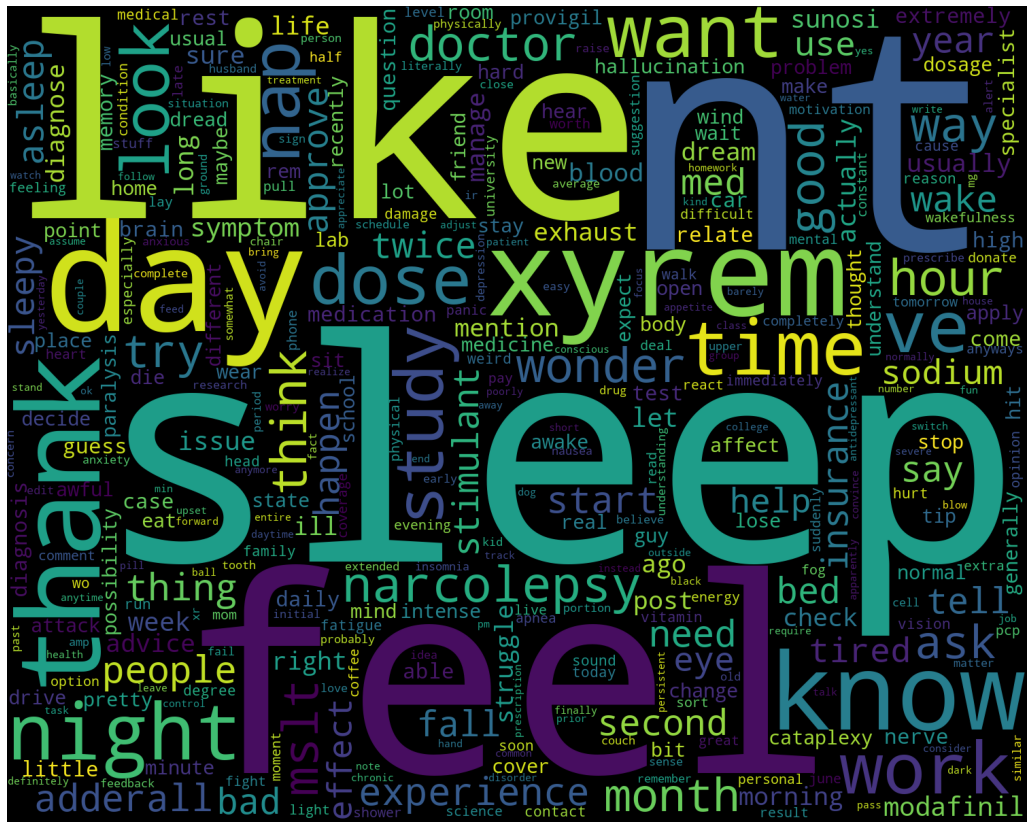

In [24]:
#plotting the post data wordcloud
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('Narcolepsy_Post_wordcloud.png')

In [25]:
#Vectorize and transform comments data with TF-IDF vectorizer
c_vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', min_df=2) ## Corpus is in English
ctdm = c_vectorizer.fit_transform(df.Cleaned_Comments)
c_feature_names = c_vectorizer.get_feature_names()

In [26]:
print(c_vectorizer.get_feature_names_out())

['able' 'absolutely' 'actually' 'add' 'adderall' 'advice' 'afternoon'
 'agree' 'answer' 'antidepressant' 'anxiety' 'apnea' 'ask' 'asleep'
 'awake' 'aware' 'away' 'awesome' 'bad' 'bed' 'begin' 'behavior' 'believe'
 'big' 'bit' 'body' 'bp' 'brain' 'bring' 'care' 'cataplexy' 'cause'
 'change' 'chronic' 'clinically' 'come' 'common' 'communicate' 'contact'
 'control' 'couple' 'course' 'cover' 'cut' 'dangerous' 'day' 'debt'
 'decent' 'definitely' 'demand' 'depression' 'diagnose' 'diagnosis'
 'difference' 'different' 'disorder' 'doc' 'doctor' 'dose' 'dream' 'drive'
 'drop' 'effect' 'elaborate' 'embarrassed' 'end' 'episode' 'exacerbate'
 'exact' 'excited' 'experience' 'explain' 'eye' 'fall' 'far' 'feel'
 'fight' 'food' 'friend' 'fully' 'function' 'good' 'great' 'grow'
 'hallucinate' 'happen' 'hear' 'heart' 'help' 'hey' 'high' 'highly' 'hope'
 'hopefully' 'hour' 'idea' 'improve' 'increase' 'insurance' 'jaw' 'job'
 'kind' 'kinda' 'know' 'learn' 'leave' 'leg' 'let' 'life' 'like' 'likely'
 'line' 

In [27]:
#Get vectorized vocabulary of comments
c_vectorizer.vocabulary_.items()

dict_items([('similar', 165), ('big', 23), ('depression', 50), ('tell', 186), ('doc', 56), ('want', 200), ('try', 194), ('tolerate', 192), ('know', 103), ('body', 25), ('nt', 135), ('start', 176), ('kinda', 102), ('kind', 101), ('small', 171), ('dose', 58), ('adderall', 4), ('right', 159), ('thing', 189), ('doctor', 57), ('willing', 205), ('work', 208), ('situation', 167), ('like', 109), ('insurance', 98), ('fully', 79), ('cover', 42), ('reason', 152), ('narcolepsy', 129), ('symptom', 184), ('control', 39), ('clinically', 34), ('bad', 18), ('way', 202), ('subjectively', 181), ('definitely', 48), ('feel', 75), ('problem', 149), ('exact', 68), ('remember', 156), ('stay', 177), ('people', 141), ('learn', 104), ('aware', 15), ('seek', 163), ('answer', 8), ('pretty', 147), ('sure', 183), ('decent', 47), ('sleep', 169), ('time', 191), ('hour', 94), ('cataplexy', 30), ('episode', 66), ('hear', 86), ('need', 130), ('order', 137), ('stimulant', 178), ('debt', 46), ('mslt', 127), ('anxiety', 10)

In [28]:
#finally lets create the wordcloud for the vectorized comments data 
ctfidf_weights = [(word, ctdm.getcol(idx).sum()) for word, idx in c_vectorizer.vocabulary_.items()]

In [29]:
#selecting first 100 weighted terms
ctfidf_weights[0:100]

[('similar', 0.4668962380940254),
 ('big', 0.5940998189262657),
 ('depression', 0.4745844383064861),
 ('tell', 0.47195296135199466),
 ('doc', 0.5380449578740446),
 ('want', 1.0299291235880688),
 ('try', 1.5061690191201536),
 ('tolerate', 0.5964429626741006),
 ('know', 3.100797933402599),
 ('body', 0.8844717339550889),
 ('nt', 5.350296760161791),
 ('start', 1.5757659232143078),
 ('kinda', 0.4668962380940254),
 ('kind', 0.6972214055759174),
 ('small', 0.37314548776905343),
 ('dose', 1.6188752675841782),
 ('adderall', 0.37358945538975596),
 ('right', 0.6247096579309853),
 ('thing', 1.360230937600607),
 ('doctor', 1.9082213988801913),
 ('willing', 0.2718668419807342),
 ('work', 1.4236481684511038),
 ('situation', 0.29699565982265796),
 ('like', 3.759241093422328),
 ('insurance', 0.9665998474656318),
 ('fully', 0.634115310334787),
 ('cover', 1.025273621372253),
 ('reason', 0.3047238726063628),
 ('narcolepsy', 2.4942866998627338),
 ('symptom', 1.1072600321525954),
 ('control', 0.893840448847

In [30]:
#making the comments wordcloud
cw = WordCloud(width=1500, height=1200, mode='RGBA', background_color='black', max_words=2000).fit_words(dict(ctfidf_weights))

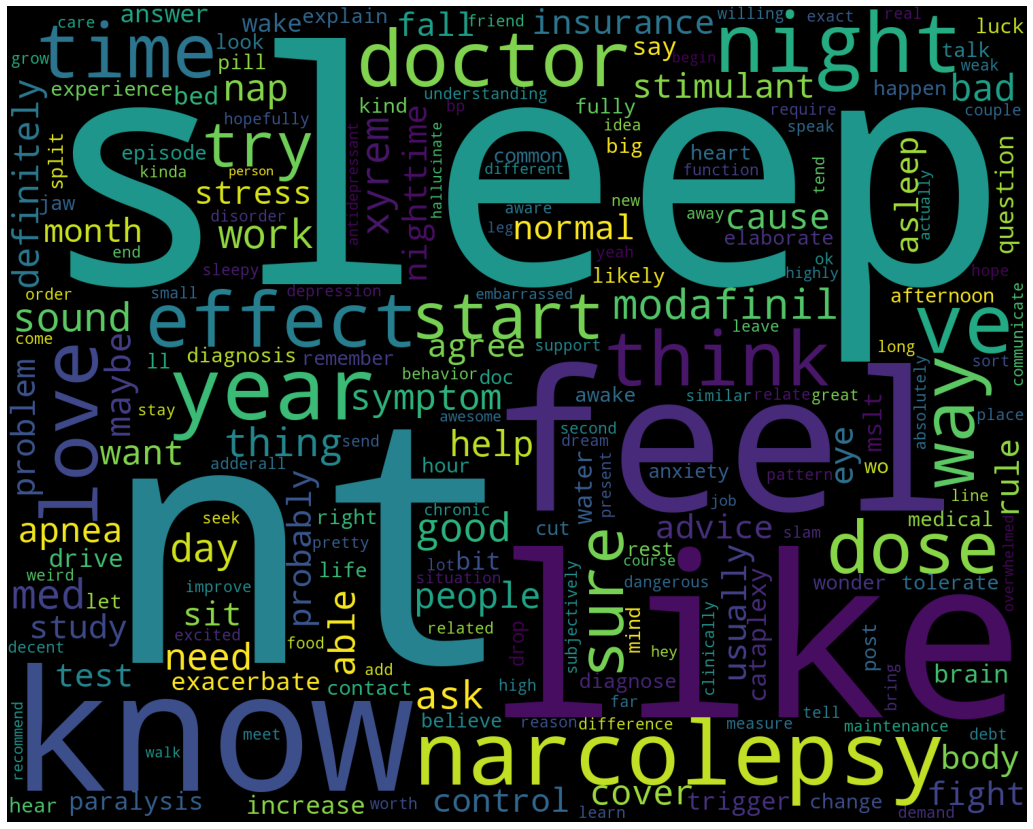

In [31]:
#Plotting the comments data wordcloud
plt.figure(figsize=(20,15))
plt.imshow(cw)
plt.axis('off')
plt.savefig('Narcolepsy_comments_wordcloud.png')

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# Vectorizer to convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()

# Learn vocabulary and idf, return term-document matrix.
tfidf = vectorizer.fit_transform(df['Cleaned_Post'].values.astype('U'))

# Array mapping from feature integer indices to feature name
words = vectorizer.get_feature_names()

# Compute cosine similarity between samples in X and Y.
similarity_matrix = cosine_similarity(tfidf, tfidf)

# Matrix product
similarity_matrix

# Instead of using fit_transform, you need to first fit 
# the new document to the TFIDF matrix corpus like this:
queryTFIDF = TfidfVectorizer().fit(words)

# We can check that using a new document text
query = 'depression.'

# Now we can 'transform' this vector into that matrix shape by using the transform function:
queryTFIDF = queryTFIDF.transform([query])

# As we transformed our query in a tfidf object
# we can calculate the cosine similarity in comparison with 
# our pevious corpora
cosine_similarities = cosine_similarity(queryTFIDF, tfidf).flatten()


# Get most similar posts based on next text
related_post_indices = cosine_similarities.argsort()[:-11:-1]
print("posts that are about", query, "include:", related_post_indices)


posts that are about depression. include: [ 2 33  3 49 13 21 20 19 18 17]


In [33]:
# Vectorizer to convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()

# Learn vocabulary and idf, return term-document matrix.
tfidf = vectorizer.fit_transform(df['Cleaned_Comments'].values.astype('U'))

# Array mapping from feature integer indices to feature name
words = vectorizer.get_feature_names()

# Compute cosine similarity between samples in X and Y.
similarity_matrix = cosine_similarity(tfidf, tfidf)

# Matrix product
similarity_matrix

# Instead of using fit_transform, you need to first fit 
# the new document to the TFIDF matrix corpus like this:
queryTFIDF = TfidfVectorizer().fit(words)

# We can check that using a new document text
query = 'depression.'

# Now we can 'transform' this vector into that matrix shape by using the transform function:
queryTFIDF = queryTFIDF.transform([query])

# As we transformed our query in a tfidf object
# we can calculate the cosine similarity in comparison with 
# our pevious corpora
cosine_similarities = cosine_similarity(queryTFIDF, tfidf).flatten()

# Get most similar comments based on next text
related_comments_indices = cosine_similarities.argsort()[:-11:-1]
print("comments that are about", query, "include:", related_comments_indices)


comments that are about depression. include: [ 0  2 19 12 22 21 20 18 17 16]
